# ML HW2

## 108598047 胡喻翔

### Q1 Implement the k-NN classifier for Iris dataset. To begin one experiment, randomly draw 70 % of the instances for training and the rest for testing. Repeat the drawing and the k-NN classification 10 times and compute the average accuracy. Then, plot the curve of k versus accuracy for k = 1, 3, ..., 15. For simplicity, use the Euclidean distance in your computation.


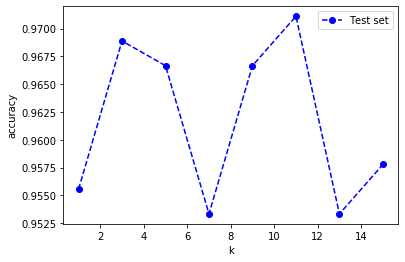

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import random

MAX_K = 15
seed = []

for i in range(10):
    seed.append(random.randint(0, 99))
    
iris = datasets.load_iris()

# Create Model
result = []
for k in range(1, MAX_K+1, 2):
    acc = 0
    for i in range(10):
        x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        acc += metrics.accuracy_score(y_test, y_pred)
    result.append(acc/10)


import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), result, 'ob--', label = 'Test set')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()


### Q2 Follow problem 1, but use Bayes optimal classifier instead. To do so, you need to compute the sample mean and sample covariance for each of the class. When you are done, compare the accuracy between k-NN, Naïve Bayes (in HW #1), and Bayes optimal classifier.

#### Ans
Ingeneral, the accuracy of Bayes optimal classifier is greater than k-NN, and k-NN is better than Naive Bayes

Naive Bayes accuracy:  0.9222222222222223
Optimal Bayes accuracy:  0.968888888888889


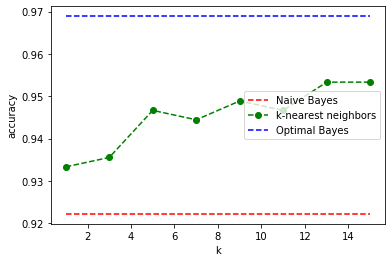

In [84]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal

# global
MAX_K = 15
seed = []
for i in range(10):
    seed.append(random.randint(0,99))

# Load dataset
iris = datasets.load_iris()

# create Gaussian Naive Bayes model
acc = 0
for i in range(10):
    # spilt data randomly
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                        random_state=seed[i])
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    acc+=metrics.accuracy_score(y_test, y_pred)
navie_bayes_result = acc/10

# Optimal Bayes
class OptimalBayes:
    def fit(self, x, y):
        self.gaussians = {}
        self._x = np.array(x)
        self._y = np.array(y)
        labels = set(self._y)
        for l in labels:
            current_x = self._x[self._y == l]
            self.gaussians[l] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T)
            }

    def score(self, x, expect_y):
        _x = np.array(x)
        _y = self.predict(_x)
        
        _expect_y = np.array(expect_y)
        return np.mean(_expect_y == _y)

    def predict(self, x):
        N = x.shape[0]
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for index, item in self.gaussians.items():
            P[:,index] = multivariate_normal.logpdf(x, item['mean'], item['cov'])
        return np.argmax(P, 1)

acc = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                        random_state=seed[i])
    ob = OptimalBayes()
    ob.fit(X_train, y_train)
    acc += ob.score(X_test, y_test)

optimal_bayes_result = acc/10


# Knn model
result_knn = []
for k in range(1, MAX_K+1, 2):
    acc = 0
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3,
                                                            random_state=seed[i])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc+=metrics.accuracy_score(y_test, y_pred)
    result_knn.append(acc/10)
    
print("Naive Bayes accuracy: ", navie_bayes_result)
print("Optimal Bayes accuracy: ", optimal_bayes_result)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), [navie_bayes_result for i in range(1, MAX_K+1, 2)], 'b--', label = 'Naive Bayes', color='red')
plt.plot(range(1, MAX_K+1, 2), result_knn, 'or--', label = 'k-nearest neighbors', color='green')
plt.plot(range(1, MAX_K+1, 2), [optimal_bayes_result for i in range(1, MAX_K+1, 2)], 'b--', label = 'Optimal Bayes', color='blue')
plt.legend()
plt.xlabel('k') 
plt.ylabel('accuracy')
plt.show()

### Q3 Consult the Internet to learn how to perform regression based on k-NN, and use the first three features (sepal length, sepal width, petal length) in each sample as input to predict the fourth feature (petal width) in the Iris dataset. To conduct one trial, again you need to divide the dataset into a training set (70%) and a test set (30%). Remember, you need to build one regression model for each class. Repeat 10 trials and plot the curve of k versus average MSE for each class for k = 1,3, ..., 15. Is k-NN regression better than linear regression (in HW #1)?

#### Ans
It seems k-NN to be better than linear regression when K is 9 for Iris-setosa and Iris-versicolor.
As K gets bigger and smaller, the mse becomes bigger, and becomes worse than linear regression.
However, for Iris-virginica, it seems to be worse than linear regression.

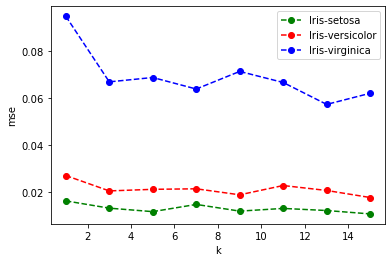

In [32]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

MAX_K = 15    

def load_iris(file_name):
    headers = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
    return pd.read_csv(file_name, names=headers)

def train_test_data_target_split(iris, test_size=0.3):
    train_x = iris[['SepalLength', 'SepalWidth', 'PetalLength']].values
    train_y = iris[['PetalWidth']].values
    return train_test_split(train_x, train_y, test_size=0.3)

def mse_test(model, data, actual):
    predict_result = model.predict(data)
    return mean_squared_error(actual, predict_result)

def train_model(k, iris, specy_name):
    iris_specy = iris.loc[iris['Species'] == specy_name]
    train_x, test_x, train_y, test_y = train_test_data_target_split(iris_specy, 0.3)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x, train_y)
    mse = mse_test(knn, test_x, test_y)
    return knn, mse

iris = load_iris('iris.data')

result = {
    'Iris-setosa': [],
    'Iris-versicolor': [],
    'Iris-virginica': []
}
for k in range(1, MAX_K+1, 2):
    mse_dict = {
        'Iris-setosa': 0,
        'Iris-versicolor': 0,
        'Iris-virginica': 0
    }
    for i in range(10):
        setosa_model, mse = train_model(k, iris, 'Iris-setosa')
        mse_dict['Iris-setosa'] += mse
        versicolor_model, mse = train_model(k, iris, 'Iris-versicolor')
        mse_dict['Iris-versicolor'] += mse
        verginica_model, mse = train_model(k, iris, 'Iris-virginica')
        mse_dict['Iris-virginica'] += mse
    result['Iris-setosa'].append(mse_dict['Iris-setosa'] / 10)
    result['Iris-versicolor'].append(mse_dict['Iris-versicolor'] / 10)
    result['Iris-virginica'].append(mse_dict['Iris-virginica'] / 10)


    
# print th result
import matplotlib.pyplot as plt
plt.plot(range(1, MAX_K+1, 2), result['Iris-setosa'], 'or--', label = 'Iris-setosa', color='green')
plt.plot(range(1, MAX_K+1, 2), result['Iris-versicolor'], 'or--', label = 'Iris-versicolor', color='red')
plt.plot(range(1, MAX_K+1, 2), result['Iris-virginica'], 'or--', label = 'Iris-virginica', color='blue')
plt.legend()
plt.xlabel('k') 
plt.ylabel('mse')
plt.show()

### Q4 Use Naïve histogram estimator to plot 𝑝̂(𝑥) for feature “sepal length” in the Iris dataset. Use all three classes in the plot with the number of bins 𝑁 = 100. Do you observe three peaks for three classes in the plot? Hint: (a) To determine the bin width, you need to know the range of values in the dataset. (b) To make 𝑝̂(𝑥) a smooth curve, you need at least 10 𝑝̂(𝑥) values for x within a bin.

#### Ans
Yes, I do observe three peaks for three classes in the plot.

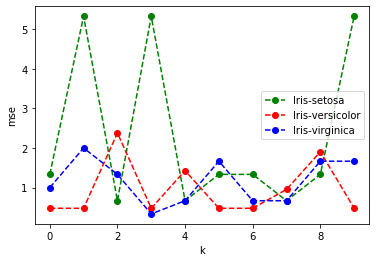

In [62]:
import pandas as pd
import random

def load_iris(file_name):
    headers = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
    return pd.read_csv(file_name, names=headers)

def getBoundary(dataList):
    max = 0
    min = 999

    for i in dataList:
        if max < i:
            max = i
        elif min > i:
            min = i
    return max, min

def getBinWidth(n, max, min):

    return (max-min)/n

def histogram(iris, specy_name, label, numOfBins):
    iris_specy = iris.loc[iris['Species'] == specy_name]
    dataList = iris_specy[label]
    max, min = getBoundary(dataList)
    h = getBinWidth(numOfBins, max, min)

    X = min
    
    pxList = []
    for i in range(numOfBins):
        count = 0
        for Xi in dataList:
            if (X-h/2 < Xi) and (Xi <= X+h/2):
                count += 1
        pxList.append(count/(numOfBins * h)) 
        X += h
        
    result = []
    while(len(result) < 10):
        index = random.randint(0, numOfBins-1)
        if pxList[index] > 0:
            result.append(pxList[index])
    return result

iris = load_iris('iris.data')
label = 'SepalLength'
numOfBins = 100

setosa_histogram = histogram(iris, 'Iris-setosa', label, numOfBins)
versicolor_histogram = histogram(iris, 'Iris-versicolor', label, numOfBins)
virginica_histogram = histogram(iris, 'Iris-virginica', label, numOfBins)

# print th result
import matplotlib.pyplot as plt
plt.plot(range(10), setosa_histogram, 'or--', label = 'Iris-setosa', color='green')
plt.plot(range(10), versicolor_histogram, 'or--', label = 'Iris-versicolor', color='red')
plt.plot(range(10), virginica_histogram, 'or--', label = 'Iris-virginica', color='blue')
plt.legend()
plt.xlabel('k') 
plt.ylabel('mse')
plt.show()


### Q5 In the lecture, we mentioned that ∑𝐽𝑗=1|𝛽𝑗| ≤ 𝑐0 is a regularization term in Lasso.
- i. Use your own words to explain why this term “regularizing” 𝛽𝑗 (i.e.,so that 𝛽𝑗 don't take extreme values).

- ii. If we implement two regression programs, one using ∑𝐽𝑗=1 |𝛽𝑗| ≤ 1and the other one using lim𝑛→∞ ∑𝐽𝑗=1 𝛽 𝑛 ≤ 1 as the regularization term, which one do you expect to have lower bias? Which one has lower variance? Hint: Simple models are more likely to have high bias, whereas complicated models are more likely to have high variance.

#### Ans
- i. As the degree of the function generated by linear regression becomes higher, the `∑𝐽𝑗=1|𝛽𝑗| ≤ 𝑐0` will be extremely large, which increase the value of the loss function. However, we want to have a function with low-value loss function; as a result, having regularization can avoid getting a function with a degree which is too high.

- ii. `lim𝑛→∞ ∑𝐽𝑗=1 𝛽 𝑛 ≤ 1` seems morelikely to have lower bias, since the degree of the function is infinite large. `∑𝐽𝑗=1 |𝛽𝑗| ≤ 1` Should have lower variance since its simply a sum of first degree variables, i.e. the dgree of function will be 2.